In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def soft_max(z):
  sigma = np.zeros((z.shape))

  J = 0
  for i in range(len(z)):
    ez = np.exp(z[i])
    J = J+ez
    sigma[i] = ez
  
  sigma = sigma/J

  return sigma

In [ ]:
d = np.linspace(-5., 5., 301)

y0 = np.zeros((d.shape))
y1 = np.ones((d.shape))
yhat = np.zeros((d.shape))

In [ ]:
L_01_0 = np.zeros((d.shape))
L_01_1 = np.zeros((d.shape))
L_q_0 =  np.zeros((d.shape))
L_q_1 =  np.zeros((d.shape))
L_xe_0 = np.zeros((d.shape))
L_xe_1 = np.zeros((d.shape))

In [ ]:
for i in range(len(d)):
  z_d = np.array([d[i],0])

  p = soft_max(z_d)
  yhat[i] = np.argmax(p)

  if y0[i] == yhat[i]:
    L_01_0[i] = 0
  else:
    L_01_0[i] = 1

  if y1[i] == yhat[i]:
    L_01_1[i] = 0 
  else:
    L_01_1[i] = 1

  L_q_0[i] = (1 - p[0])**2
  L_q_1[i] = (1 - p[1])**2

  L_xe_0[i] = -(np.log(p[0]))
  L_xe_1[i] = -(np.log(p[1]))

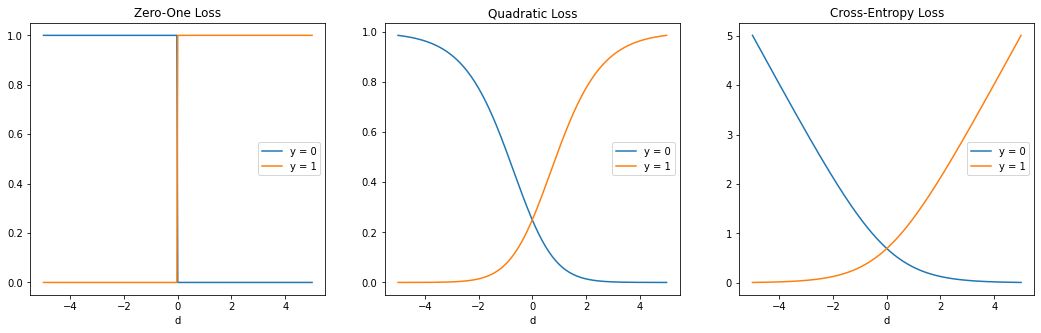

In [ ]:
plt.figure(figsize=(18, 5))

losses = [[L_01_0,L_01_1],[L_q_0, L_q_1],[L_xe_0,L_xe_1]]
title = ["Zero-One Loss","Quadratic Loss","Cross-Entropy Loss"]

for j in range(1,4):
  plt.subplot(1,3,j)
  plt.plot(d,losses[j-1][0],label ="y = 0")
  plt.plot(d,losses[j-1][1],label = "y = 1")
  plt.xlabel('d')
  plt.title(title[j-1])
  plt.legend()


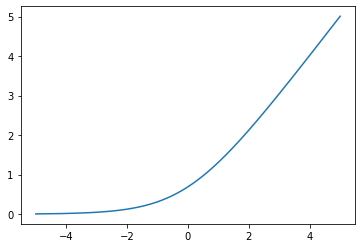

In [ ]:

plt.plot(d,L_xe_1)

PROBLEM 3.1

Inputs $x_1$ and $x_2$, with the values as follows:
$$x_1 = 1$$
$$x_2 = 1$$

The activations $a_1$ and $a_2$ in the first layer of the network are obtained:
$$a_1 = 2 - 1 + 0 = 1$$
$$a_2 = 1 + 0 - 2 = -1$$

The outputs $y_1$ and $y_2$ at the first layer using the non-linearity ReLU function:
$$y_1 = ReLU(a_1) = 1$$
$$a_2 = ReLU(a_2) = 0$$

The activation $a_3$ and the corresponding output $y_{hat}$ at the second layer is computed to be:
$$a_3 = 1 +0 +0 = 1$$
$$y_{hat} = ReLU(a_3) = 1$$

**Therefore**,
$$y_{hat} = 1$$

PROBLEM 3.2

Let the vector of weights be given as the following:

$$W = [w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9]$$<br>

The general equations for the activations and the outputs at each layer of the given network are mentioned below:

$$a_1 = x_1w_1 + x_2w_2 + w_3$$

$$y_1 = ReLU(a_1)$$

$$a_2 = x_1w_4 + x_2w_5 + w_6$$

$$y_2 = ReLU(a_2)$$

$$a_3 = y_1w_7 + y_2w_8 + w_9$$

$$y_{hat} = ReLU(a_3)$$<br>

Note:
$$\frac{dReLU(x)}{dx} = 0,  x<0$$<br>
$$\frac{dReLU(x)}{dx} = 1,  x>0$$

We assume that for this purpose of calculating gradients, $x$ > 0<br>
<br>

The gradients of the output $y_{hat}$ with respect to the weights is calculated as below (moving backwards and using chain-rule):

$$\frac{dy_{hat}}{dw_9} = \frac{dy_{hat}}{da_3}.\frac{da_3}{dw_9} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + y_2w_8 + w_9)}{dw_9} = 1 $$<br>

$$\frac{dy_{hat}}{dw_8} = \frac{dy_{hat}}{da_3}.\frac{da_3}{dw_8} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + y_2w_8 + w_9)}{dw_8} = y_2 $$<br>

$$\frac{dy_{hat}}{dw_7} = \frac{dy_{hat}}{da_3}.\frac{da_3}{dw_7} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + y_2w_8 + w_9)}{dw_7} = y_1 $$<br>

$$\frac{dy_{hat}}{dw_6} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_2}.\frac{da_2}{dw_6} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_2}.\frac{d(x_1w_4 + x_2w_5 + w_6)}{dw_6} = w_8 $$<br>

$$\frac{dy_{hat}}{dw_5} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_2}.\frac{da_2}{dw_5} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_2}.\frac{d(x_1w_4 + x_2w_5 + w_6)}{dw_5} = w_8x_2 $$<br>

$$\frac{dy_{hat}}{dw_4} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_2}.\frac{da_2}{dw_4} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_2}.\frac{d(x_1w_4 + x_2w_5 + w_6)}{dw_4} = w_8x_1 $$<br>

$$\frac{dy_{hat}}{dw_3} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_1}.\frac{da_1}{dw_3} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_1}.\frac{d(x_1w_1 + x_2w_2 + w_3)}{dw_3} = w_7 $$<br>

$$\frac{dy_{hat}}{dw_2} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_1}.\frac{da_1}{dw_2} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_1}.\frac{d(x_1w_1 + x_2w_2 + w_3)}{dw_2} = w_7x_2 $$<br>

$$\frac{dy_{hat}}{dw_1} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_1}.\frac{da_1}{dw_1} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_1}.\frac{d(x_1w_1 + x_2w_2 + w_3)}{dw_1} = w_7x_1 $$<br>

**Therefore**,

The vector of gradients of $y_{hat}$ with respect to the weights is given as:

$$[w_7x_1,w_7x_2,w_7,w_8x_1,w_8x_2,w_8,y_1,y_2,1]$$
